In [146]:
import yfinance as yf
import numpy as np
import pandas as pd
from ripser import Rips
import persim
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [147]:
# Define a list of tickers
# tickers = ['^GSPC']
tickers = ['^GSPC', '^DJI', '^IXIC', '^RUT']

In [148]:
# Set the end date to today
# end_date = datetime.today()
end_date = '2022-04-21'

In [149]:
# Set the start date from 2 years ago
# start_date = end_date - timedelta(days=2*365)
# print(start_date)
start_date = '2018-01-01'

In [150]:
# Pull data into a empty dataframe
df = pd.DataFrame()

for ticker in tickers:
    raw_data = yf.download(ticker, start=start_date, end=end_date)
    df = raw_data

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [151]:
# Checking to see if there is any missing data
df.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [152]:
# Fetching only close price
df_close = df['Adj Close']
# len(df_close)
df_close = df_close.to_frame()
df_close

,Adj Close
Date,
2018-01-02,1550.010010
2018-01-03,1552.579956
2018-01-04,1555.719971
2018-01-05,1560.010010
2018-01-08,1561.810059
...,...
2022-04-13,2025.099976
2022-04-14,2004.979980
2022-04-18,1990.130005


In [153]:
# Define array of adjusted closing prices
P = df_close.to_numpy()
# Define array of log-returns defined as the log of the ratio between closing values of two subsequent days
r = np.log(np.divide(P[1:],P[:len(P)-1]))

In [154]:
# Instantiate Vietoris-Rips solver
rips = Rips(maxdim=2)

# some parameters
w = 20 # time window size
n = len(raw_data)-(2*w)+1 # number of time segments
wasserstein_dists = np.zeros((n,1)) # initialize array for wasserstein distances

# compute wasserstein distances between persitence diagrams for subsequent time windows
for i in range(n):
    # Compute persistence diagrams for adjacent time windows
    dgm1 = rips.fit_transform(r[i:i+w])
    dgm2 = rips.fit_transform(r[i+w+1:i+(2*w)+1])
    # Compute wasserstein distance between diagrams
    wasserstein_dists[i] = persim.wasserstein(dgm1[0], dgm2[0], matching=False)

Rips(maxdim=2, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


d:\Projects\TDA\tdavenv\Lib\site-packages\persim\wasserstein.py:51: UserWarning: dgm1 has points with non-finite death times;ignoring those points
  warnings.warn(
d:\Projects\TDA\tdavenv\Lib\site-packages\persim\wasserstein.py:61: UserWarning: dgm2 has points with non-finite death times;ignoring those points
  warnings.warn(
d:\Projects\TDA\tdavenv\Lib\site-packages\persim\wasserstein.py:51: UserWarning: dgm1 has points with non-finite death times;ignoring those points
  warnings.warn(
d:\Projects\TDA\tdavenv\Lib\site-packages\persim\wasserstein.py:61: UserWarning: dgm2 has points with non-finite death times;ignoring those points
  warnings.warn(
d:\Projects\TDA\tdavenv\Lib\site-packages\persim\wasserstein.py:51: UserWarning: dgm1 has points with non-finite death times;ignoring those points
  warnings.warn(
d:\Projects\TDA\tdavenv\Lib\site-packages\persim\wasserstein.py:61: UserWarning: dgm2 has points with non-finite death times;ignoring those points
  warnings.warn(
d:\Projects\TDA\

Text(0.5, 1.0, 'Homology Changes Predicted Crash??')

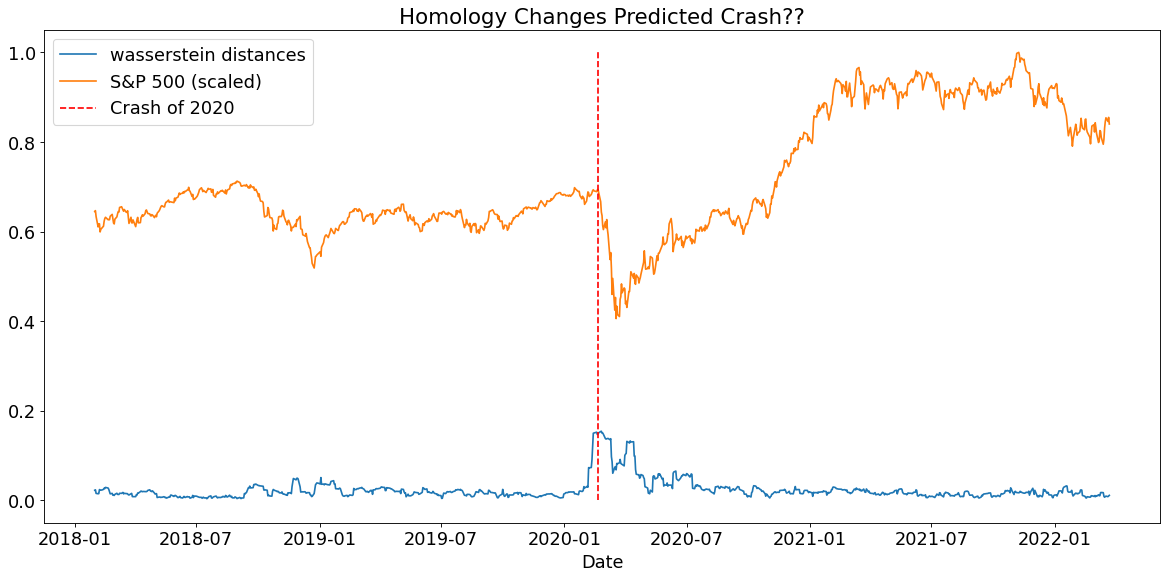

In [155]:
# Plot wasserstein distances over time
plt.figure(figsize=(18, 8), dpi=80)
plt.rcParams.update({'font.size': 16})

plt.plot(raw_data.index[w:n+w], wasserstein_dists)
plt.plot(raw_data.index[w:n+w], df_close.iloc[w:n+w,0]/max(df_close.iloc[w:n+w,0]))
# plt.plot([raw_data.index[501], raw_data.index[501]], [0, 1], 'r--')
plt.plot([raw_data.index[536], raw_data.index[536]], [0, 1], 'r--')
plt.legend(['wasserstein distances', 'S&P 500 (scaled)', 'Crash of 2020'])
plt.xlabel('Date')
plt.title('Homology Changes Predicted Crash??')

# plt.savefig('Homology_example.png', dpi='figure', format=None, metadata=None, bbox_inches=None, pad_inches=0.1, facecolor='white', edgecolor='auto')